In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
df = pd.read_csv("new_train.csv") 
#df.head(5)

In [2]:
df.describe()

,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,...,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
count,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,2.990000e+02,299.000000,299.000000,299.000000,...,299.000000,2.990000e+02,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,2.990000e+02
mean,2143.761371,2168.767057,2117.974080,2143.821572,2143.167692,8.887711e+05,1.745160e+14,194.891973,197.075753,192.474916,...,1043.030702,3.684102e+06,3.847515e+14,1334.502508,1352.688629,1314.262542,1333.175753,1333.481204,1.452351e+06,1.929842e+14
std,410.899677,415.209457,405.959346,410.811877,410.279270,6.008330e+05,8.226471e+13,44.718733,45.140896,44.427882,...,94.085013,1.675875e+06,1.817890e+14,100.768718,100.730048,99.079224,99.713093,99.205523,7.033592e+05,9.361880e+13
min,478.700000,487.900000,476.000000,482.050000,481.890000,3.925400e+04,9.406740e+12,152.500000,155.850000,149.000000,...,823.480000,4.235880e+05,5.394390e+13,1156.100000,1194.800000,1150.000000,1160.650000,1169.910000,7.335200e+04,1.138270e+13
25%,2079.200000,2110.100000,2052.775000,2083.000000,2083.265000,5.485695e+05,1.141445e+14,169.125000,170.900000,167.050000,...,1000.215000,2.531522e+06,2.669885e+14,1253.175000,1270.875000,1235.500000,1254.050000,1254.165000,9.689265e+05,1.300165e+14
50%,2230.000000,2264.900000,2205.200000,2232.000000,2226.640000,7.367350e+05,1.584380e+14,176.700000,178.400000,174.000000,...,1051.980000,3.310703e+06,3.370080e+14,1314.000000,1329.500000,1292.000000,1311.500000,1309.890000,1.324664e+06,1.747470e+14
75%,2354.900000,2380.000000,2329.250000,2355.000000,2355.085000,1.011911e+06,2.094625e+14,194.275000,196.075000,193.000000,...,1108.635000,4.321131e+06,4.636000e+14,1386.500000,1402.750000,1370.000000,1384.750000,1385.440000,1.702507e+06,2.268060e+14
max,2566.000000,2583.300000,2553.700000,2565.800000,2570.700000,5.354489e+06,4.793650e+14,309.750000,313.450000,309.000000,...,1273.500000,1.167429e+07,1.278360e+15,1595.000000,1608.500000,1571.100000,1588.750000,1587.400000,5.100637e+06,7.278990e+14


In [4]:
df.dtypes

Date                 object
Open-Stock-1        float64
High-Stock-1        float64
Low-Stock-1         float64
Close-Stock-1       float64
VWAP-Stock-1        float64
Volume-Stock-1        int64
Turnover-Stock-1    float64
Open-Stock-2        float64
High-Stock-2        float64
Low-Stock-2         float64
Close-Stock-2       float64
VWAP-Stock-2        float64
Volume-Stock-2        int64
Turnover-Stock-2    float64
Open-Stock-3        float64
High-Stock-3        float64
Low-Stock-3         float64
Close-Stock-3       float64
VWAP-Stock-3        float64
Volume-Stock-3        int64
Turnover-Stock-3    float64
Open-Stock-4        float64
High-Stock-4        float64
Low-Stock-4         float64
Close-Stock-4       float64
VWAP-Stock-4        float64
Volume-Stock-4        int64
Turnover-Stock-4    float64
Open-Stock-5        float64
High-Stock-5        float64
Low-Stock-5         float64
Close-Stock-5       float64
VWAP-Stock-5        float64
Volume-Stock-5        int64
Turnover-Stock-5    

In [2]:
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
df.index=df['Date']

In [ ]:
df

In [3]:
# Select only the important features i.e. the date and price
df = df[["Date","Close-Stock-1"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
df = df.rename(columns = {"Date":"ds","Close-Stock-1":"y"}) #renaming the columns of the dataset
df.head(5)

,ds,y
Date,,
2010-06-01,2010-06-01,1855.10
2010-06-02,2010-06-02,1853.05
2010-06-03,2010-06-03,1905.60
2010-06-04,2010-06-04,1885.70
2010-06-07,2010-06-07,1876.65


In [4]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(df) # fit the model using all data

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


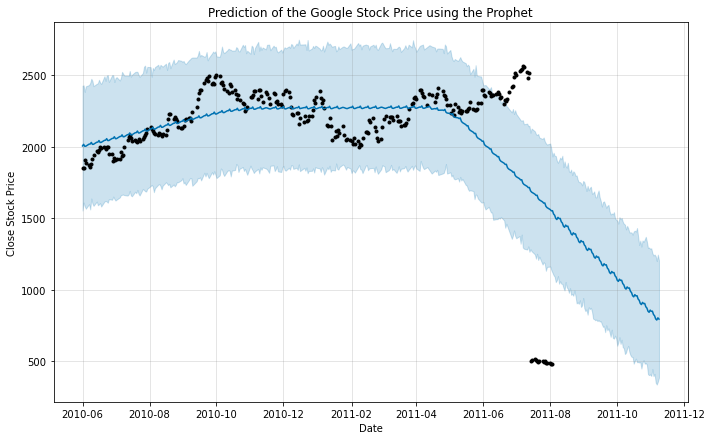

In [5]:
future = m.make_future_dataframe(periods=97) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

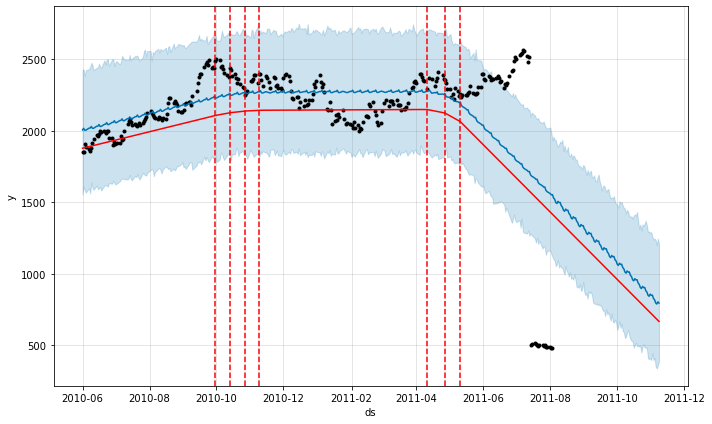

In [6]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), m, prediction)

In [ ]:
m.plot_components(prediction)
plt.show()

In [ ]:
prediction

In [7]:
pred_tail=prediction.tail(97)

In [8]:
pred_tail

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
299,2011-08-04,1409.105375,1102.827964,1959.372562,1409.105375,1409.105375,121.882118,121.882118,121.882118,121.298832,121.298832,121.298832,0.583286,0.583286,0.583286,0.0,0.0,0.0,1530.987493
300,2011-08-05,1401.382499,1091.815949,1937.555761,1401.382499,1401.382499,120.372541,120.372541,120.372541,121.298832,121.298832,121.298832,-0.926292,-0.926292,-0.926292,0.0,0.0,0.0,1521.755039
301,2011-08-06,1393.659623,1054.253646,1936.939579,1393.659623,1393.659623,106.136478,106.136478,106.136478,121.298832,121.298832,121.298832,-15.162354,-15.162354,-15.162354,0.0,0.0,0.0,1499.796101
302,2011-08-07,1385.936746,1067.287546,1903.578286,1385.936746,1385.939973,106.136478,106.136478,106.136478,121.298832,121.298832,121.298832,-15.162354,-15.162354,-15.162354,0.0,0.0,0.0,1492.073224
303,2011-08-08,1378.213870,1096.410357,1888.863499,1378.198850,1378.308719,129.238360,129.238360,129.238360,121.298832,121.298832,121.298832,7.939528,7.939528,7.939528,0.0,0.0,0.0,1507.452230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2011-11-04,698.600769,413.059542,1247.425855,624.082445,782.299311,120.372541,120.372541,120.372541,121.298832,121.298832,121.298832,-0.926292,-0.926292,-0.926292,0.0,0.0,0.0,818.973310
392,2011-11-05,690.877893,351.662976,1236.064599,615.937856,776.934452,106.136478,106.136478,106.136478,121.298832,121.298832,121.298832,-15.162354,-15.162354,-15.162354,0.0,0.0,0.0,797.014371
393,2011-11-06,683.155017,338.055256,1201.639849,607.047033,770.971401,106.136478,106.136478,106.136478,121.298832,121.298832,121.298832,-15.162354,-15.162354,-15.162354,0.0,0.0,0.0,789.291495
394,2011-11-07,675.432141,358.697358,1246.774863,597.385438,764.734790,129.238360,129.238360,129.238360,121.298832,121.298832,121.298832,7.939528,7.939528,7.939528,0.0,0.0,0.0,804.670500


In [ ]:
predictions= pd.DataFrame(pred_tail, columns = ['yhat'])

In [ ]:
predictions.to_csv (r'C:\Users\MarkCichonski\Learn ML 2021 Grand AI Challenge\resultspr5.csv', index = False, header=True)

In [ ]:
#https://facebook.github.io/prophet/